# Дипломная работа по курсу «Python для анализа данных»

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import seaborn as sns
import statistics
from scipy import stats
%matplotlib inline

**1.Загрузить файл hr.csv**

In [2]:
df = pd.read_csv("hr.csv")
df.head(15)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


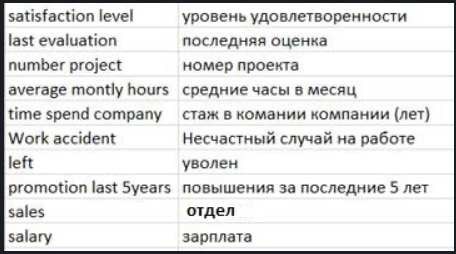

In [3]:
from PIL import Image
img = Image.open("image (1).png")
img

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


**2. Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение)**

In [5]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [6]:
df.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


**3.Рассчитать и визуализировать корреляционную матрицу для переменных**

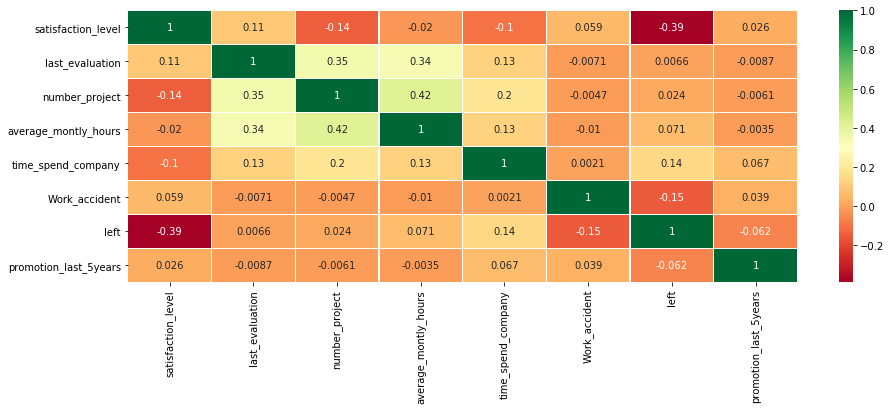

In [12]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #df.corr()-->матрица корреляций
fig=plt.gcf() #получение текущей фигуры
fig.set_size_inches(15,5) #установить размер фигуры
plt.show()

**4.Визуализировать несколько взаимосвязей между переменными**

судя по матрице корреляции и графикам, корреляции между переменными выражены слабо.

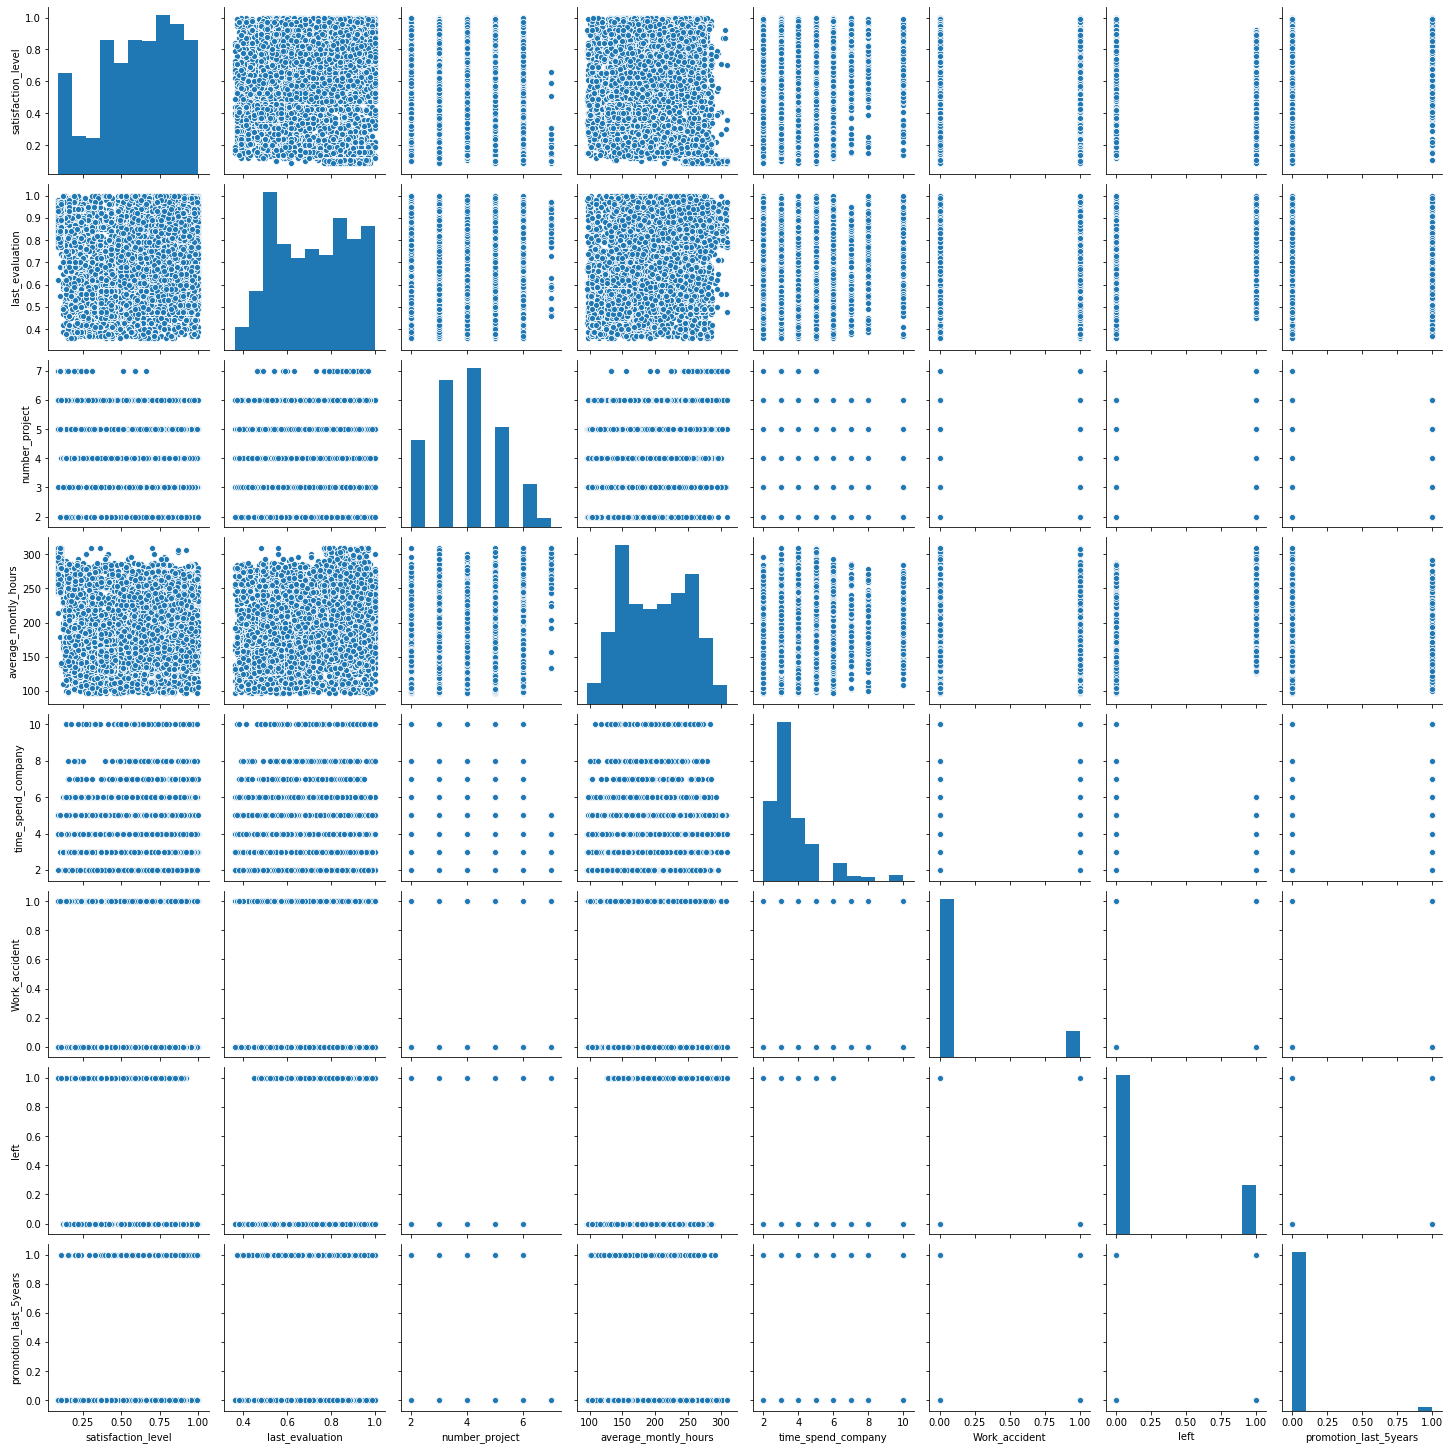

In [7]:
sns.pairplot(df)

если разделить дата сет на уволившихся и работающих сотрудников, то возникают сильно выраженные взаимосвязи между переменными.

In [8]:
def class_left(param):
    if param == 0:
        return "no"
    elif param == 1:
        return "yes"

In [9]:
df['class_left'] = df['left'].apply(class_left)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,class_left
0,0.38,0.53,2,157,3,0,1,0,sales,low,yes
1,0.80,0.86,5,262,6,0,1,0,sales,medium,yes
2,0.11,0.88,7,272,4,0,1,0,sales,medium,yes
3,0.72,0.87,5,223,5,0,1,0,sales,low,yes
4,0.37,0.52,2,159,3,0,1,0,sales,low,yes


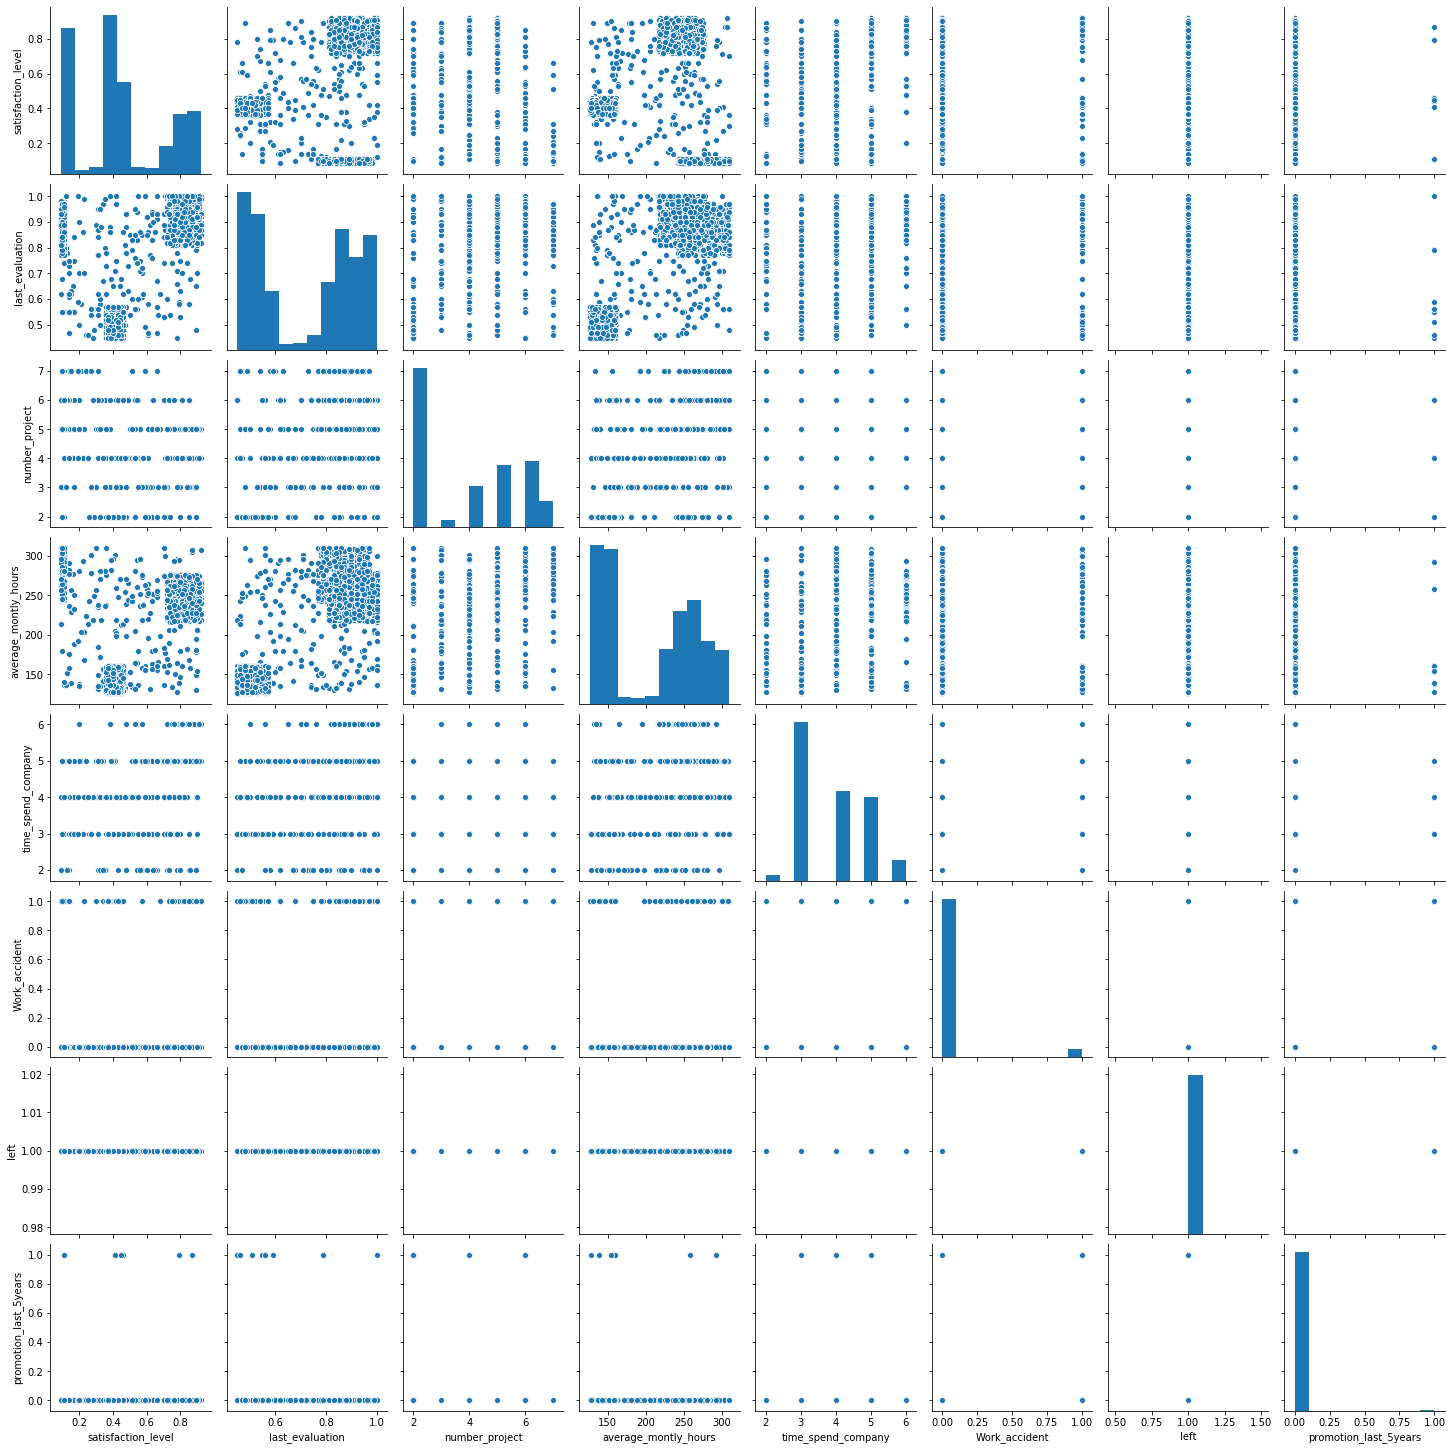

In [10]:
df_left = df[df['class_left'] == "yes"]
sns.pairplot(df_left)

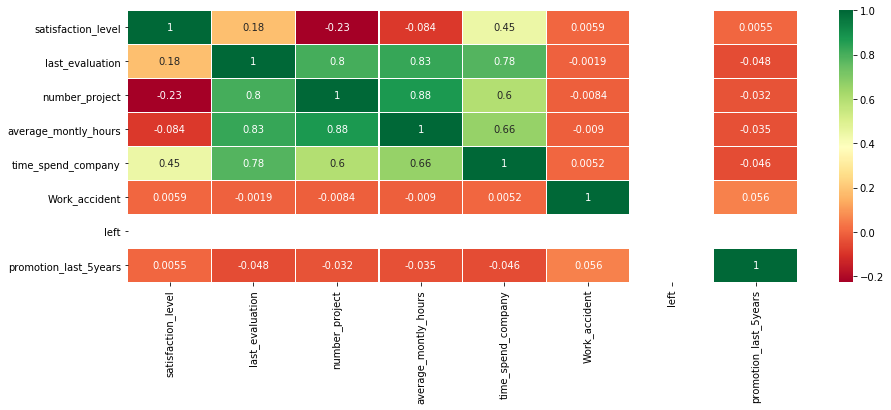

In [11]:
sns.heatmap(df_left.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #df.corr()-->матрица корреляций
fig=plt.gcf() #получение текущей фигуры
fig.set_size_inches(15,5) #установить размер фигуры
plt.show()

**5.С использованием t-test статистики проверить взаимосвязи между несколькими переменными**

In [13]:
print(len(df[df['salary'] == 'low']))
print(len(df[df['salary'] == 'medium']))
print(len(df[df['salary'] == 'high']))

7316
6446
1237


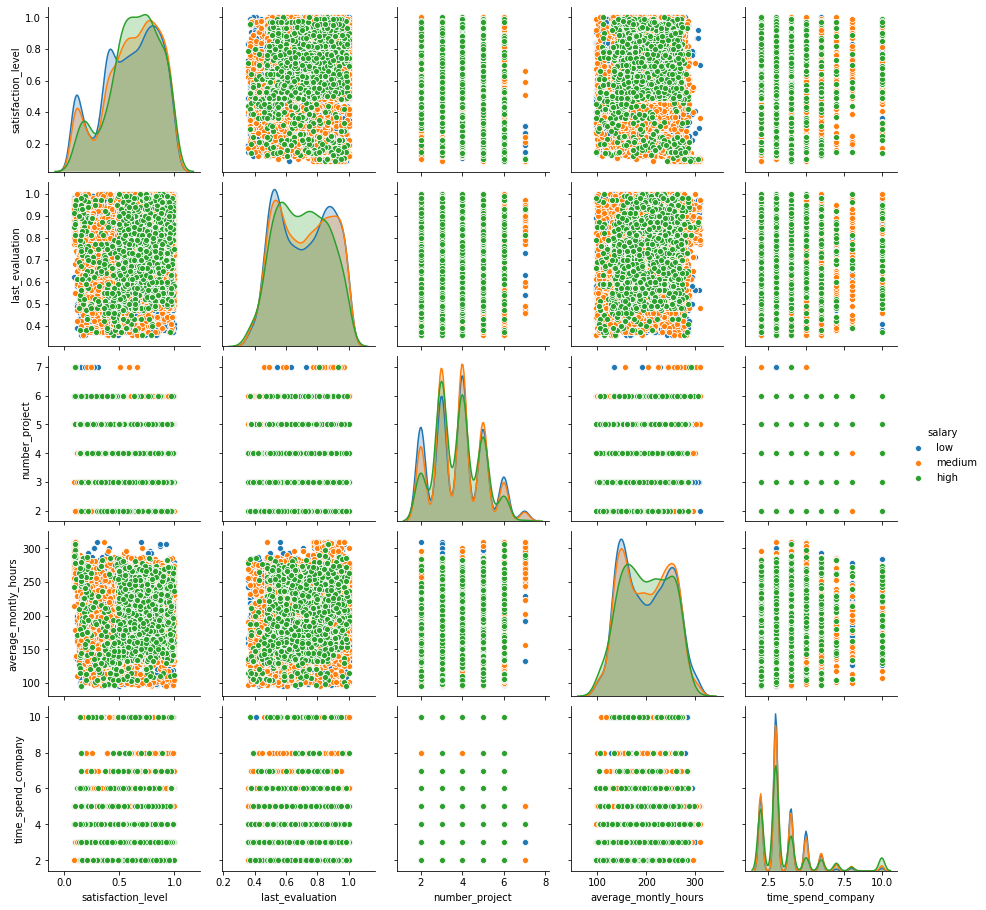

In [14]:
sns.pairplot(data=df,vars=['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company'], hue='salary')

In [15]:
satisf_low_salary = df[df['salary']=='low']['satisfaction_level']
satisf_high_salary = df[df['salary']=='high']['satisfaction_level']

print(stats.ttest_ind(satisf_low_salary, satisf_high_salary))

Ttest_indResult(statistic=-4.76273109535092, pvalue=1.9413281282548522e-06)


p-value меньше 0.05, значит, группы статистически отличаются.

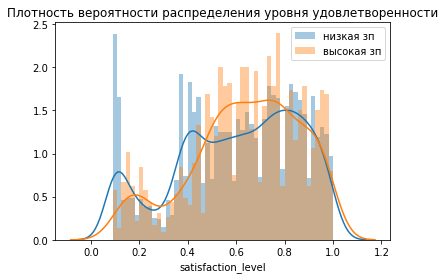

In [16]:
sns.distplot(satisf_low_salary, 50)
sns.distplot(satisf_high_salary, 50)
plt.title('Плотность вероятности распределения уровня удовлетворенности')
plt.legend(['низкая зп', 'высокая зп'])
plt.show()

**6.Рассчитать сколько работников работает в каждом департаменте**

In [17]:
df['count_people'] = 1
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,class_left,count_people
0,0.38,0.53,2,157,3,0,1,0,sales,low,yes,1
1,0.80,0.86,5,262,6,0,1,0,sales,medium,yes,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,yes,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,yes,1
4,0.37,0.52,2,159,3,0,1,0,sales,low,yes,1


In [18]:
df_department = df.groupby('sales').count()[['count_people']].reset_index()
df_department

,sales,count_people
0,IT,1227
1,RandD,787
2,accounting,767
3,hr,739
4,management,630
5,marketing,858
6,product_mng,902
7,sales,4140
8,support,2229
9,technical,2720


**7.Показать распределение сотрудников по зарплатам**

In [19]:
df_salary = df.groupby('salary').count()[['count_people']].reset_index()
df_salary

,salary,count_people
0,high,1237
1,low,7316
2,medium,6446


**8.Показать распределение сотрудников по зарплатам совместно с департаментами**

In [20]:
df_dep_salary = df.groupby(['sales', 'salary']).count()[['count_people']].reset_index()
df_dep_salary

,sales,salary,count_people
0,IT,high,83
1,IT,low,609
2,IT,medium,535
3,RandD,high,51
4,RandD,low,364
5,RandD,medium,372
6,accounting,high,74
7,accounting,low,358
8,accounting,medium,335
9,hr,high,45


**9.Сколько сотрудников покинули компанию**

In [21]:
print(f'уволилось сотрудников: {len(df[df["left"] == 1])}')

уволилось сотрудников: 3571


**10.Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию**

***10.1. Уволиленные сотрудники больше работают***

In [22]:
df_left_av = df[df['class_left'] == "yes"]['average_montly_hours']
df_no_left_av = df[df['class_left'] == "no"]['average_montly_hours']

In [23]:
len(df_left_av), len(df_no_left_av)

(3571, 11428)

In [25]:
df_left_av = df_left_av.sample(3571)
df_no_left_av = df_no_left_av.sample(3571)

In [26]:
sts.mannwhitneyu(df_left_av,df_no_left_av)

MannwhitneyuResult(statistic=5992836.5, pvalue=5.456688775019666e-06)

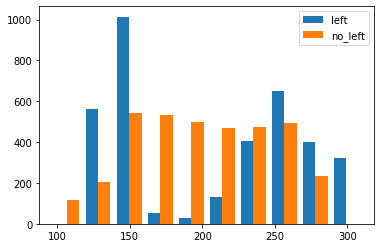

In [27]:
plt.hist([df_left_av, df_no_left_av], bins = 10, label=['left', 'no_left'])
plt.legend(loc='upper right')
plt.show()

гипотеза не подтверждается pvalue меньше 0.05. Зависимости между отработанным временем и увольнениями нет.

***10.2. Увольняются сотрудники с низким уровнем удовлетворенности***

In [28]:
df_sat_left = df[df['class_left'] == "yes"]['satisfaction_level']
df_sat_no_left = df[df['class_left'] == "no"]['satisfaction_level']

In [29]:
len(df_sat_left), len(df_sat_no_left)

(3571, 11428)

In [30]:
df_sat_left = df_sat_left.sample(3571)
df_sat_no_left = df_sat_no_left.sample(3571)

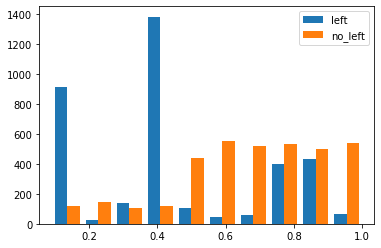

In [31]:
plt.hist([df_sat_left, df_sat_no_left], bins = 10, label=['left', 'no_left'])
plt.legend(loc='upper right')
plt.show()

In [32]:
sts.shapiro(df_sat_left)

(0.8881876468658447, 4.203895392974451e-45)

In [33]:
statistics.variance(df_sat_left), statistics.variance(df_sat_no_left)

(0.06966085873834273, 0.04630848812445729)

In [34]:
sts.ttest_ind(df_sat_left, df_sat_no_left, equal_var=False)

Ttest_indResult(statistic=-40.119214741007134, pvalue=0.0)

In [ ]:
распределение не нормальное, pvalue = 0, из чего следует, что гипотеза не принимается.
Но если смотреть на график, то кажется, что у уволенных сотрудников оценка удовлетворенности ниже.

***10.3. У уволиленных сотрудников меньше зар плата***

In [35]:
class_salary_1 = df[df['salary']=='low']['left']
class_salary_2 = df[df['salary']=='medium']['left']
class_salary_3 = df[df['salary']=='high']['left']

stats.f_oneway(class_salary_1, class_salary_2, class_salary_3)

F_onewayResult(statistic=195.54449374860312, pvalue=1.4608629258860592e-84)

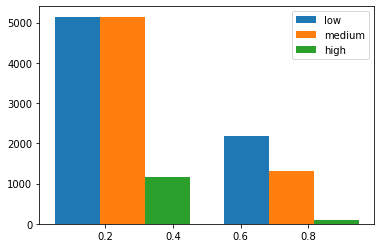

In [36]:
plt.hist([class_salary_1, class_salary_2, class_salary_3], bins = 2, label=['low', 'medium', 'high'])
plt.legend(loc='upper right')
plt.show()

pvalue меньше 0,05, уровень зар платы не оказыаает влияние на желание покинуть компанию